In [1]:
import logging
import os
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat.notebook

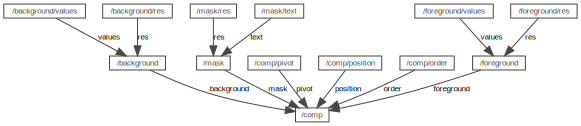

INFO:imagecat.operator:Task /foreground fill:
INFO:imagecat.operator:  components: ['r', 'g', 'b']
INFO:imagecat.operator:  layer: C
INFO:imagecat.operator:  res: [256 128]
INFO:imagecat.operator:  role: Role.RGB
INFO:imagecat.operator:  values: [0 0 0]
INFO:imagecat.operator:  output: Image(C: Layer(256x128x3 float16 ['r', 'g', 'b'] Role.RGB))
INFO:imagecat.operator:Task /background fill:
INFO:imagecat.operator:  components: ['r', 'g', 'b']
INFO:imagecat.operator:  layer: C
INFO:imagecat.operator:  res: [2560 1440]
INFO:imagecat.operator:  role: Role.RGB
INFO:imagecat.operator:  values: [1.  0.5 0. ]
INFO:imagecat.operator:  output: Image(C: Layer(2560x1440x3 float16 ['r', 'g', 'b'] Role.RGB))
INFO:imagecat.operator:Task /mask fontname: /Users/tshead/src/imagecat/imagecat/LeagueSpartan-SemiBold.ttf
INFO:imagecat.operator:Task /mask text:
INFO:imagecat.operator:  anchor: mm
INFO:imagecat.operator:  fontindex: 0
INFO:imagecat.operator:  fontname: /Users/tshead/src/imagecat/imagecat/Leag


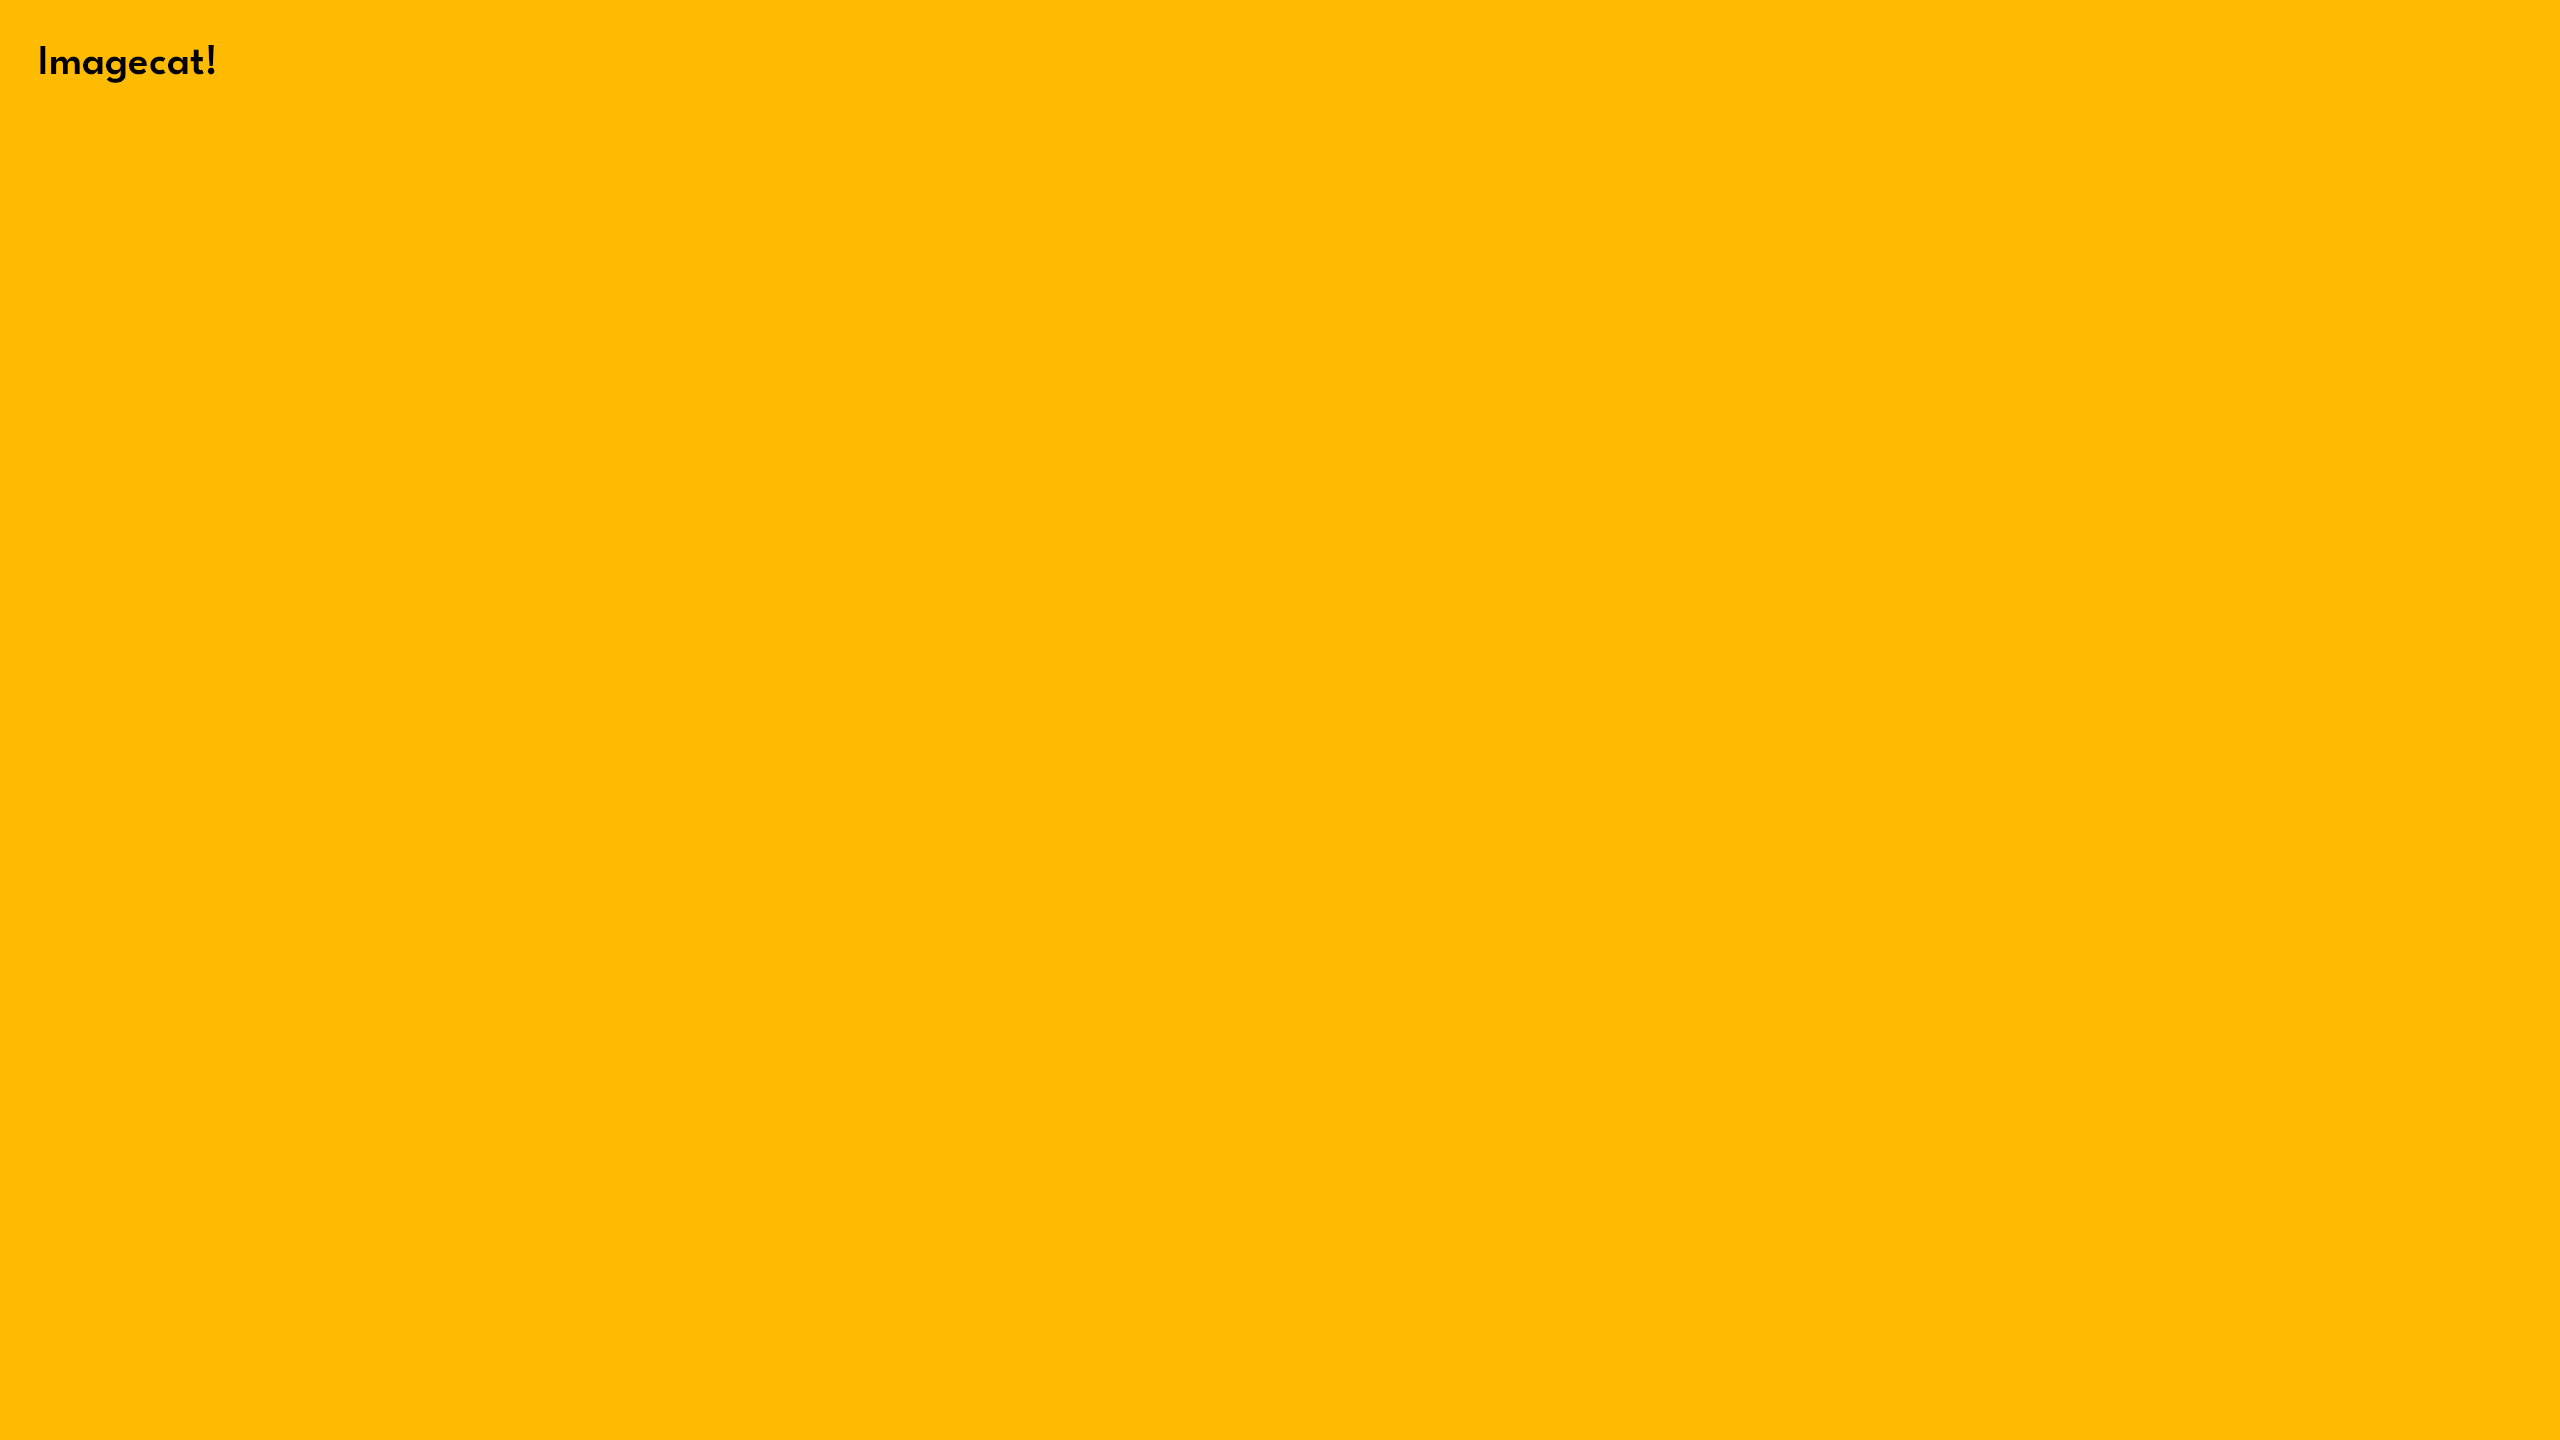

In [2]:
graph = graphcat.Graph()
monitor = graphcat.PerformanceMonitor(graph)
imagecat.add_task(graph, "/foreground", imagecat.operator.fill, values=[0, 0, 0], res=[256, 128])
imagecat.add_task(graph, "/background", imagecat.operator.fill, values=[1, 0.5, 0], res=[2560, 1440])
imagecat.add_task(graph, "/mask", imagecat.operator.text, res=[256, 128], text="Imagecat!")
imagecat.add_task(graph, "/comp", imagecat.operator.composite, pivot=("0w", "1h"), position=("0w", "1h"), order=0)
imagecat.set_links(graph, "/foreground", ("/comp", "foreground"))
imagecat.set_links(graph, "/background", ("/comp", "background"))
imagecat.set_links(graph, "/mask", ("/comp", "mask"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/comp"))

In [3]:
sorted(monitor.tasks.items(), key=lambda item: item[1], reverse=True)

[('/comp', [0.5461256504058838]),
 ('/background', [0.07584118843078613]),
 ('/mask', [0.010048151016235352]),
 ('/foreground', [0.005375862121582031]),
 ('/comp/pivot', [1.71661376953125e-05]),
 ('/mask/text', [1.6927719116210938e-05]),
 ('/background/res', [1.1205673217773438e-05]),
 ('/mask/res', [8.106231689453125e-06]),
 ('/background/values', [7.867813110351562e-06]),
 ('/comp/position', [6.9141387939453125e-06]),
 ('/foreground/res', [6.198883056640625e-06]),
 ('/foreground/values', [5.9604644775390625e-06]),
 ('/comp/order', [5.7220458984375e-06])]